## info

Datos de Jimena y Script por Cesar.
2024-10-56. Santiago - Solo pasé el script de Cesar a funciones y las parametricé para generalizar más el código.

In [27]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import gaussian_kde
import matplotlib.image as mpimg  # cargar imagenes
from pathlib import Path # agregar manejo de directorio para cualquier sistema operativo

## Funciones

In [34]:
def cargar_preparar_archivos(directory):

    """
    Cargar archivos CVS en un directorio y concatenarlos en un dataframe
    """
    directory = Path(directory)  # asegurarnos que el directorio sea un objeto de Path
    # cambiar for loop a lista para mejorar el rendimiento
    dataframes = [
        pd.read_csv(file).assign(Source_file=file.name) # llevar registro de archivos
        for file in directory.glob("*.csv")
    ]
    # Combinar, remover NAs
    combined_df = pd.concat(dataframes, ignore_index=True).dropna().reset_index(drop=True)
    return combined_df



def normalizar_coordenadas(df, ref_df, x_col='Centre position X', y_col='Centre position Y'):
    """
    Normalizar coordenadas X y Y tomando en cuenta el mínimo y máximo
    """

    ref_xmin, ref_xmax = ref_df[x_col].min(), ref_df[x_col].max()
    ref_ymin, ref_ymax = ref_df[y_col].min(), ref_df[y_col].max()

    xmin, xmax = df[x_col].min(), df[x_col].max()
    ymin, ymax = df[y_col].min(), df[y_col].max()

    df[x_col] = (df[x_col] - xmin) / (xmax - xmin) * (ref_xmax - ref_xmin) + ref_xmin
    df[y_col] = (df[y_col] - ymin) / (ymax - ymin) * (ref_ymax - ref_ymin) + ref_ymin

    return df


def plot_heatmap_overlay(x, y, title, output_file, maze_image_path, vmin_opt=None, vmax_opt=None, alpha=0.8):
    """
    NUEVO:
    agregar una figura del laberinto para que se plotee bajo el mapa de calor
    """
    # cargar imagen del lab
    maze_img = mpimg.imread(maze_image_path)

    # kde y vmin vmax
    kde = gaussian_kde([x, y], bw_method=0.5)
    kde_values = kde([x, y])

    if vmin_opt is None:
        vmin_opt = np.percentile(kde_values, 1)
    if vmax_opt is None:
        vmax_opt = np.percentile(kde_values, 99)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 8))

    # figura del laberinto
    # ax.imshow(maze_img, extent=[150, 500, 100, 400], aspect='auto')  # Ajustar la imagen del laberinto para que se vea bien en los datos
    ax.imshow(maze_img, extent=[120, 540, 90, 390], aspect='auto')  # Ajustar la imagen del laberinto para que se vea bien en los datos

    # heatmap
    sns.kdeplot(x=x, y=y, fill=True, cmap='Spectral_r', bw_adjust=0.8, levels=100, ax=ax, alpha=alpha)

    # Set titles and labels
    ax.set_title(title, pad=20)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # remover barra de colores (comentar si se quiere borrar)
    # normalizar y crear barra de colroes 
    norm = colors.Normalize(vmin=vmin_opt, vmax=vmax_opt)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    sm = plt.cm.ScalarMappable(cmap='Spectral_r', norm=norm)
    sm.set_array([])
    fig.colorbar(sm, cax=cax, label='Density')  # Comentar o cambiar para barra de colores


    # guardar figura 
    # hacer compatible con todos los sistemas operativos
    output_file = Path(output_file)  # Ensure the output path is a Path object
    with output_file.open('wb') as f:
        fig.savefig(f, dpi=300, bbox_inches='tight')
    
    plt.show()


def greet():
    print("Olii, soy Mapas de Calor")

def main():
    print("Datos por JImena, código principal por Cesar, apoyo por Monse (ay no se si ve con t) y Santi.")
    greet()

if __name__ == "__main__":
    main()

Datos por JImena, código principal por Cesar, apoyo por Monse (ay no se si ve con t) y Santi.
Olii, soy Mapas de Calor


## USO

### CUMS-NOEE-Post

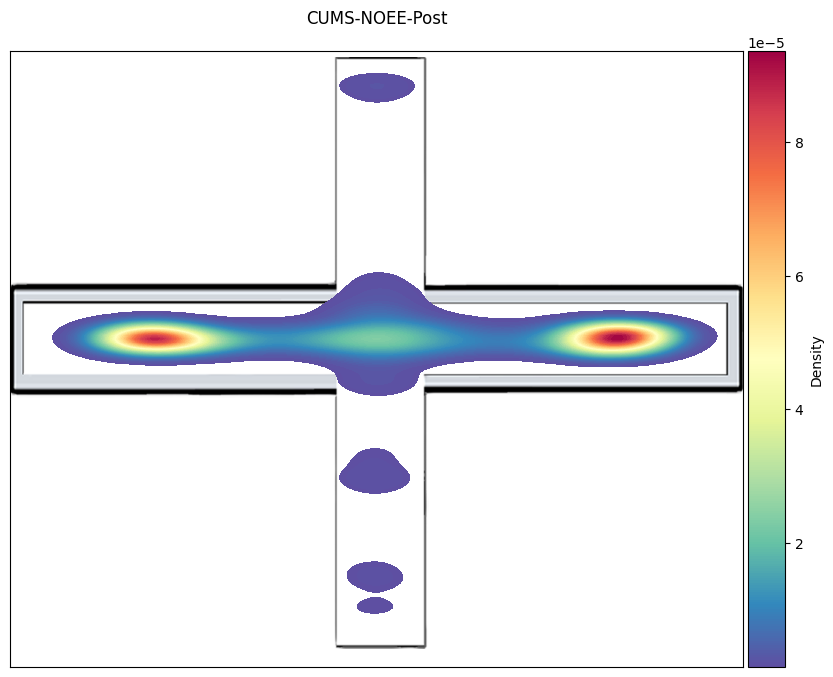

In [35]:
def main():
    # definir directorio
    data_dir = Path("datos") / "CUMS-NoEE-Post"
    maze_image_path = Path("figuras") / "laberinto_overlay" / "lab_cruz.png"
    output_file = Path("figuras") / "CUMS-NOEE-Post.png"

    # cargar datos
    df1 = cargar_preparar_archivos(data_dir)
    
    # 
    x = df1['Centre position X'].values
    y = df1['Centre position Y'].values

    # Plot
    plot_title = 'CUMS-NOEE-Post'
    plot_heatmap_overlay(x, y, plot_title, output_file, maze_image_path, alpha=1) 


if __name__ == "__main__":
    main()

### Control-NoEE

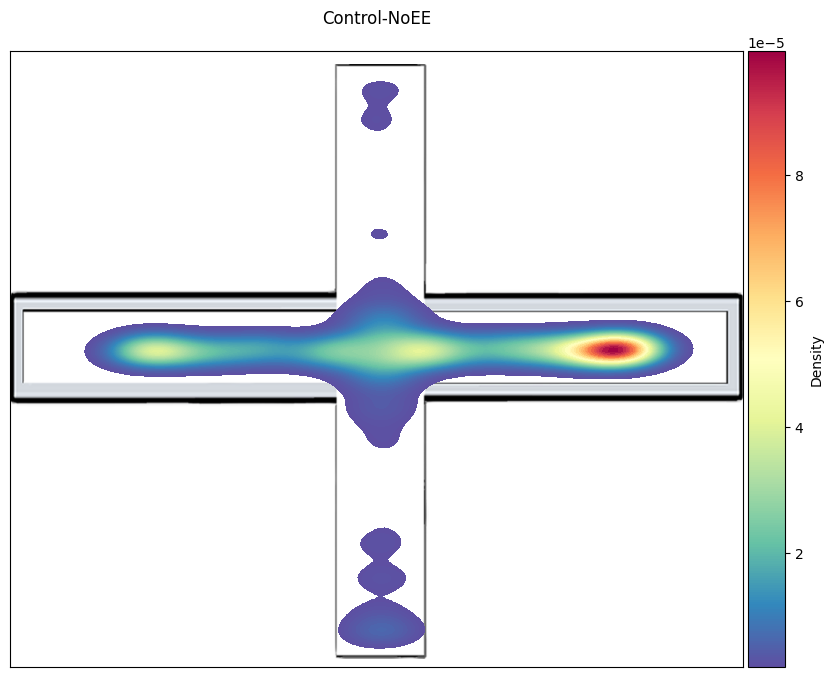

In [36]:
def main():
    # definir directorio
    data_dir = Path("datos") / "Control-NoEE"
    maze_image_path = Path("figuras") / "laberinto_overlay" / "lab_cruz.png"
    output_file = Path("figuras") / "Control-NoEE.png"

    # cargar datos
    df1 = cargar_preparar_archivos(data_dir)
    
    # 
    x = df1['Centre position X'].values
    y = df1['Centre position Y'].values

    # Plot
    plot_title = 'Control-NoEE'
    plot_heatmap_overlay(x, y, plot_title, output_file, maze_image_path, alpha=1) 


if __name__ == "__main__":
    main()

### Control_EE

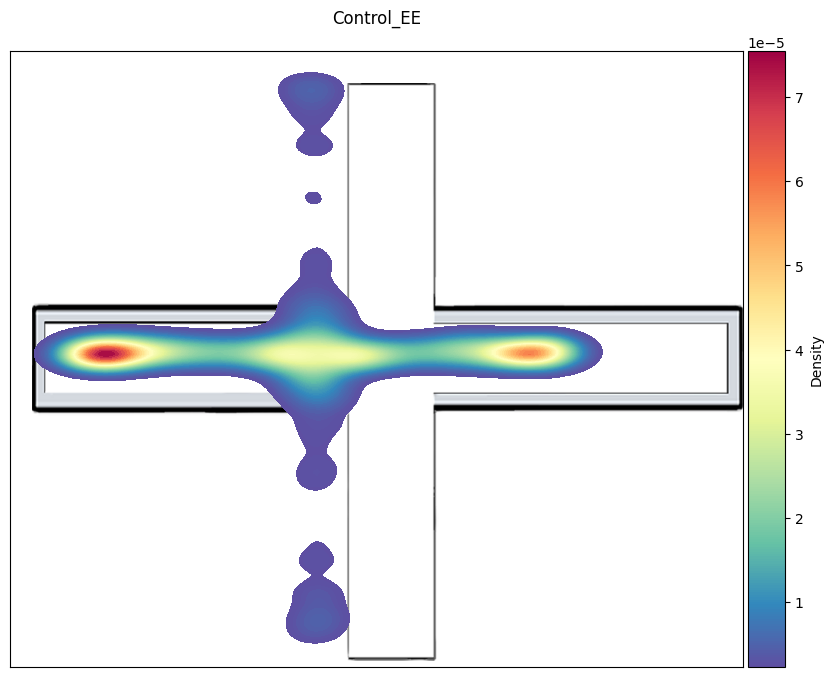

In [38]:
######
## PROBLEMA
## acomodar las coordenadas del laberinto para que salga bien

def main():
    # definir directorio
    data_dir = Path("datos") / "Control_EE"
    maze_image_path = Path("figuras") / "laberinto_overlay" / "lab_cruz.png"
    output_file = Path("figuras") / "Control_EE.png"

    # cargar datos
    df1 = cargar_preparar_archivos(data_dir)
    
    # 
    x = df1['Centre position X'].values
    y = df1['Centre position Y'].values

    # Plot
    plot_title = 'Control_EE'
    plot_heatmap_overlay(x, y, plot_title, output_file, maze_image_path, alpha=1) 


if __name__ == "__main__":
    main()

### Sham


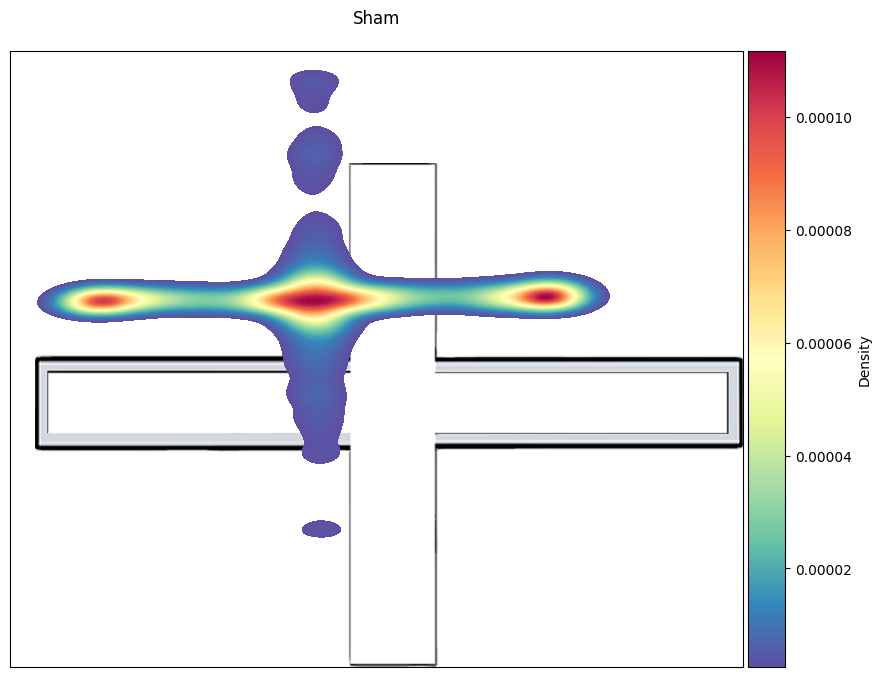

In [39]:
def main():
    # definir directorio
    data_dir = Path("datos") / "Sham"
    maze_image_path = Path("figuras") / "laberinto_overlay" / "lab_cruz.png"
    output_file = Path("figuras") / "Sham.png"

    # cargar datos
    df1 = cargar_preparar_archivos(data_dir)
    
    # 
    x = df1['Centre position X'].values
    y = df1['Centre position Y'].values

    # Plot
    plot_title = 'Sham'
    plot_heatmap_overlay(x, y, plot_title, output_file, maze_image_path, alpha=1) 


if __name__ == "__main__":
    main()

### IRR


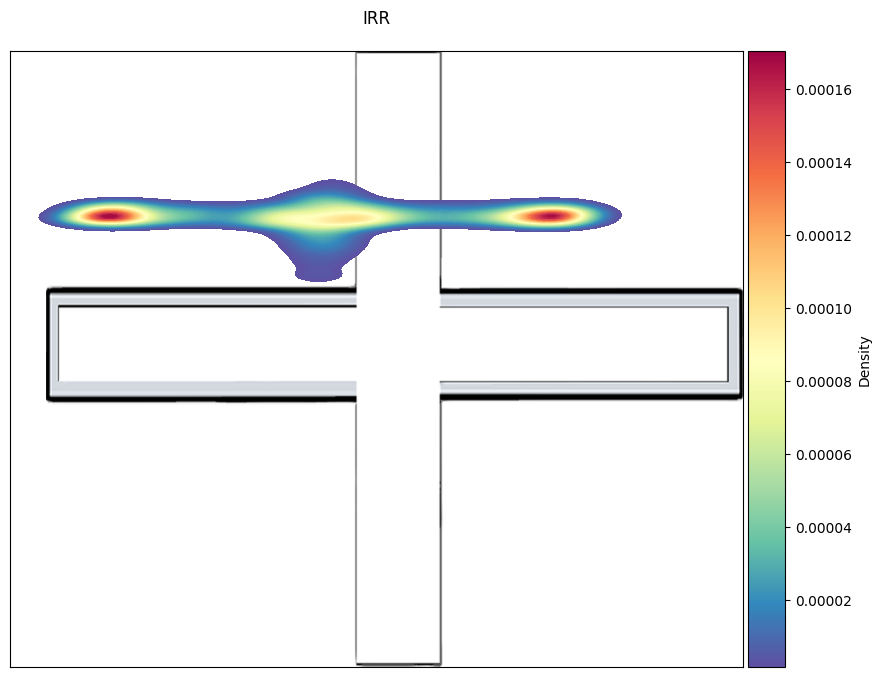

In [40]:
def main():
    # definir directorio
    data_dir = Path("datos") / "IRR"
    maze_image_path = Path("figuras") / "laberinto_overlay" / "lab_cruz.png"
    output_file = Path("figuras") / "IRR.png"

    # cargar datos
    df1 = cargar_preparar_archivos(data_dir)
    
    # 
    x = df1['Centre position X'].values
    y = df1['Centre position Y'].values

    # Plot
    plot_title = 'IRR'
    plot_heatmap_overlay(x, y, plot_title, output_file, maze_image_path, alpha=1) 


if __name__ == "__main__":
    main()